In [138]:
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.dataset import random_split

In [139]:
class costom_datasets(Dataset):
    def __init__(self, tensor_x, tensor_y):
        self.x = tensor_x
        self.y = tensor_y
    
    def __getitem__(self, index):
        return (self.x[index], self.y[index])

    def __len__(self):
        return len(self.x)

In [140]:
import numpy as np
np.random.seed(42)
x = np.random.rand(100)
y = 1 + 2*x + 0.1*np.random.randn(100)

In [142]:
import torch
tensor_x = torch.FloatTensor(x)
tensor_y = torch.FloatTensor(y)
dataset = costom_datasets(tensor_x, tensor_y)
train_dataset, val_dataset = random_split(dataset, [80, 20])

In [173]:
# len(dataset)
# dataset[0]
train_dataset[0]

(tensor(0.7722), tensor(2.4208))

In [145]:
train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
valid_loader = DataLoader(dataset=val_dataset, batch_size=20, shuffle=False)

it shuffles every epoch, so that every batch is different

In [147]:
import torch.nn as nn
class linearNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(linearNN, self).__init__()
        
        self.input_size = input_size
        self.output_size = output_size
        
#         self.a = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
#         self.b = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.l = nn.Linear(input_size, output_size)
    
    def forward(self, x):
#         return self.a + self.b * x
        return self.l(x)

In [148]:
#create a train_step, input will be the model, loss_fn, and the optimizer

def make_train_step(model, loss_fn, optim):
    
    def train_step(x, y):
        model.train()
        
        yhat = model(x)
        loss = loss_fn(y, yhat)
        
        optim.zero_grad()
        loss.backward()
        optim.step()
        
        return loss.item()
    return train_step    

In [150]:
# initialize all the parameters
import torch.optim as optim
lr = 0.1
epochs = 1000
model = linearNN(1, 1)
loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr = lr)
train_step = make_train_step(model=model, loss_fn=loss_fn, optim=optimizer) 

In [153]:
for x, y in train_loader:
    print(x)

tensor([0.5427, 0.6011, 0.8662, 0.6233, 0.8948, 0.1079, 0.9656, 0.3042, 0.1818,
        0.8022, 0.1196, 0.9507, 0.3110, 0.9489, 0.9219, 0.3252])
tensor([0.1409, 0.8872, 0.0746, 0.9869, 0.0206, 0.3568, 0.7751, 0.5142, 0.4938,
        0.5987, 0.4402, 0.8084, 0.0465, 0.7722, 0.0651, 0.0977])
tensor([0.1997, 0.8324, 0.1159, 0.3887, 0.5979, 0.1220, 0.0344, 0.5924, 0.0452,
        0.2912, 0.0636, 0.0740, 0.3664, 0.7069, 0.8631, 0.2588])
tensor([0.7710, 0.5201, 0.1560, 0.2713, 0.3253, 0.5227, 0.7713, 0.3745, 0.6376,
        0.2809, 0.7296, 0.6842, 0.6625, 0.5613, 0.1560, 0.3309])
tensor([0.7081, 0.0055, 0.1395, 0.7852, 0.7320, 0.1834, 0.7132, 0.8287, 0.9696,
        0.9699, 0.4319, 0.5467, 0.2123, 0.1960, 0.4722, 0.6119])


In [155]:
# start to train 
losses = []
valid_losses = []
for epoch in range(epochs):
    for x, y in train_loader:
        loss = train_step(x.unsqueeze(1), y.unsqueeze(1))
        losses.append(loss)
    
    with torch.no_grad():
        for x, y in valid_loader:
            y_val = model(x.unsqueeze(1))
            valid_loss = loss_fn(y.unsqueeze(1), y_val)
            valid_losses.append(valid_loss)
print(model.state_dict())

OrderedDict([('l.weight', tensor([[1.9470]])), ('l.bias', tensor([1.0202]))])


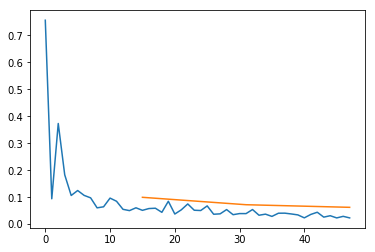

In [163]:
import matplotlib.pyplot as plt
plt.plot(losses[:48])
plt.plot([15,31,47],valid_losses[:3])
plt.show()

animate it 

In [164]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [249]:
fig = plt.figure('1')
train_loader1 = DataLoader(dataset=train_dataset, batch_size=len(train_dataset), shuffle=False)
x, y = next(iter(train_loader1))
plt.scatter(x, y)

lr = 0.1
epochs = 100
model = linearNN(1, 1)
loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr = lr)
train_step = make_train_step(model=model, loss_fn=loss_fn, optim=optimizer)

line, = plt.plot(x, model(x.unsqueeze(1)).data.numpy(),'r')
plt.close()

def animate(i):
    if (i!=0):
        y_set = model(x.unsqueeze(1)).data.numpy()
        line.set_ydata(y_set)
        for x_t, y_t in train_loader:
            loss = train_step(x_t.unsqueeze(1), y_t.unsqueeze(1))
    
animation.FuncAnimation(fig, animate, np.arange(0, 30), interval=200)

animatino has some bug, skip the first two frame